# Employee Attrition

Employee Attrition is the process of an Employee leaving a company. In this dataset, various factors which could be the reason of attrition is specified. Thus, I have performed EDA on the model to analyze the importance of the features in the model and have performed Classification using 6 Classification Models.

Importing Liberaries thos are Requireds 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Importing the Data

In [7]:
data=pd.read_csv("C:\\Users\\Admin\\Desktop\\datasets\\MFG10YearTerminationData.csv")

In [8]:
data.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [9]:
data.shape

(49653, 18)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

# EDA

In [74]:
data.describe()

,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000
mean,42.077035,10.434596,27.297605,2010.612612
std,12.427257,6.325286,13.514134,2.845577
min,19.000000,0.000000,1.000000,2006.000000
25%,31.000000,5.000000,16.000000,2008.000000
50%,42.000000,10.000000,28.000000,2011.000000
75%,53.000000,15.000000,42.000000,2013.000000
max,65.000000,26.000000,46.000000,2015.000000


In [11]:
data.isnull().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

Dropping Duplicates

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


Dropping unwanted columns


In [15]:
data.drop(["EmployeeID","recorddate_key","birthdate_key","gender_full"],axis=1,inplace=True)

In [16]:
data

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Layoff,Involuntary,2015,TERMINATED,STORES
49651,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Resignaton,Voluntary,2013,TERMINATED,STORES


Unique values in city

In [17]:
data.city_name.value_counts()

Vancouver           11211
Victoria             4885
Nanaimo              3876
New Westminster      3211
Kelowna              2513
Burnaby              2067
Kamloops             2061
Prince George        2048
Cranbrook            1785
Surrey               1560
Richmond             1401
Terrace              1228
Chilliwack           1167
Trail                 925
Langley               901
Vernon                898
Squamish              806
Quesnel               703
Abbotsford            681
North Vancouver       648
Fort St John          621
Williams Lake         617
West Vancouver        613
Port Coquitlam        545
Aldergrove            520
Fort Nelson           322
Nelson                317
New Westminister      254
Grand Forks           236
White Rock            231
Haney                 182
Princeton             136
Dawson Creek          129
Bella Bella           126
Ocean Falls            65
Pitt Meadows           57
Cortes Island          43
Valemount              37
Dease Lake  

Value counts in Department Name

In [18]:
data.department_name.value_counts()

Meats                     10269
Dairy                      8599
Produce                    8515
Bakery                     8381
Customer Service           7122
Processed Foods            5911
Store Management            271
Executive                   100
Recruitment                  72
HR Technology                64
Accounting                   59
Employee Records             44
Accounts Receiveable         39
Labor Relations              34
Accounts Payable             34
Training                     30
Compensation                 24
Audit                        24
Investment                   24
Information Technology       20
Legal                        17
Name: department_name, dtype: int64

Value counts in job title

In [19]:
data.job_title.value_counts()

Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Bakery Manager                      285
Meats Manager                       285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Labor Relations Analyst              30
Accounts Receiveable Clerk           30
Trainer                              26
Accounts Payable Clerk               25
Auditor                              20
Systems Analyst                      20
Investment Analyst                   20
Compensation Analyst                 20
Corporate Lawyer                     17


Value Counts in gender_short

In [21]:
data.gender_short.value_counts()

F    25898
M    23755
Name: gender_short, dtype: int64

Value Counts in termreason_desc

In [22]:
data.termreason_desc.value_counts()

Not Applicable    48168
Retirement          885
Resignaton          385
Layoff              215
Name: termreason_desc, dtype: int64

Value Counts in STATUS Year

In [23]:
data.STATUS_YEAR.value_counts()

2013    5320
2012    5231
2014    5215
2011    5082
2010    4963
2015    4961
2009    4852
2008    4767
2007    4683
2006    4579
Name: STATUS_YEAR, dtype: int64

Value Counts in STATUS

In [80]:
data.STATUS.value_counts()

ACTIVE        48168
TERMINATED     1485
Name: STATUS, dtype: int64

Value Counts in Business_Unit

In [25]:
data.BUSINESS_UNIT.value_counts()

STORES        49068
HEADOFFICE      585
Name: BUSINESS_UNIT, dtype: int64

Converting Job title into Four category

In [26]:
board = ['CEO','VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance', 'Director, Accounts Receivable', 
         'Director, Accounting', 'Director, Employee Records', 'Director, Accounts Payable', 'Director, HR Technology', 
         'Director, Investments', 'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']

executive = [ 'Exec Assistant, VP Stores', 'Exec Assistant, Legal Counsel', 'CHief Information Officer', 
             'Exec Assistant, Human Resources', 'Exec Assistant, Finance']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']

employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

def job_title(job):
    if job in board:return 'board'
    if job in executive:return 'executive'
    if job in manager:return'manager'
    if job in employee:return 'employee'
    
data['job_title']=data['job_title'].map(job_title)

In [27]:
data.job_title.unique()

array(['board', 'employee', 'executive', 'manager'], dtype=object)

Changing the city names

In [28]:
city_population = {
    'Vancouver':2313328,
     'Victoria':289625,
     'Nanaimo':84905,
     'New Westminster':58549,
     'Kelowna':125109,
     'Burnaby':202799,
     'Kamloops':68714,
     'Prince George':65558,
     'Cranbrook':18610,
     'Surrey':394976,
     'Richmond':182000,
     'Terrace':19443,
     'Chilliwack':77000,
     'Trail':9707,
     'Langley':23606,
     'Vernon':47274,
     'Squamish':19512,
     'Quesnel':13799,
     'Abbotsford':151683,
     'North Vancouver':48000,
     'Fort St John':17402,
     'Williams Lake':14168,
     'West Vancouver':42694,
     'Port Coquitlam':114565,
     'Aldergrove':12363,
     'Fort Nelson':3561,
     'Nelson':9813,
     'New Westminister':58549,
     'Grand Forks':4049,
     'White Rock':66450,
     'Haney':82256,
     'Princeton':2828,
     'Dawson Creek':10802,
     'Bella Bella':1019,
     'Ocean Falls':129,
     'Pitt Meadows':174410,
     'Cortes Island':1042,
     'Valemount':1021,
     'Dease Lake':335,
     'Blue River':157
}

def change_city_into_city_pop(city):
    return city_population(city)

data['city_name'] = data['city_name'].map(city_population)

Converting cities into 'Rural' or 'Town'

In [29]:
def change_city(population):
    str = 'rural'
    if (population >= 10000) & (population < 100000): str = 'town'
    if population >= 100000: str = 'mega'
    return str

data['city_name'] = data.city_name.map(change_city)

Checking city names after reduction

In [30]:
data.city_name.value_counts()

mega     24920
town     22499
rural     2234
Name: city_name, dtype: int64

In [31]:
data

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1/1/1900,52,17,mega,Executive,board,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,8/28/1989,1/1/1900,53,18,mega,Executive,board,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,8/28/1989,1/1/1900,54,19,mega,Executive,board,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,8/28/1989,1/1/1900,55,20,mega,Executive,board,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,8/28/1989,1/1/1900,56,21,mega,Executive,board,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8/19/2013,12/30/2015,21,2,rural,Dairy,employee,34,M,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8/27/2013,8/30/2013,19,0,mega,Customer Service,employee,44,F,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,9/15/2013,12/30/2015,21,2,town,Customer Service,employee,39,F,Layoff,Involuntary,2015,TERMINATED,STORES
49651,10/9/2013,12/31/2013,19,0,mega,Customer Service,employee,16,F,Resignaton,Voluntary,2013,TERMINATED,STORES


# Visualisations

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

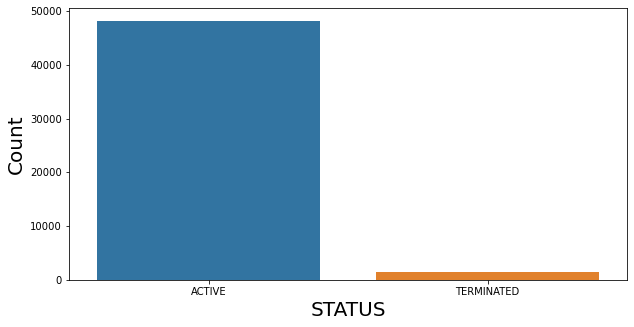

In [32]:
status_label = data.STATUS.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(status_label.index,status_label);
plt.xlabel("STATUS",fontsize=20);
plt.ylabel('Count',fontsize=20)

Above barplot states that the data are Imbalanced

To make the classes balanced

In [33]:
from sklearn.utils import resample
#seperate the target classes
df1=data[data.STATUS=='ACTIVE']
df2=data[data.STATUS=='TERMINATED']

#Upsample the minority class
df2_upsampled=resample(df2,replace = True,n_samples=48168,random_state=10)


combining majority class with upsample minority class

In [34]:
df_upsample=pd.concat([df1,df2_upsampled])

In [35]:
df_upsample.STATUS.value_counts()

ACTIVE        48168
TERMINATED    48168
Name: STATUS, dtype: int64

In [36]:
df_upsample

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1/1/1900,52,17,mega,Executive,board,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,8/28/1989,1/1/1900,53,18,mega,Executive,board,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,8/28/1989,1/1/1900,54,19,mega,Executive,board,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,8/28/1989,1/1/1900,55,20,mega,Executive,board,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,8/28/1989,1/1/1900,56,21,mega,Executive,board,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48989,1/2/1999,6/27/2007,60,8,mega,Produce,employee,5,M,Retirement,Voluntary,2007,TERMINATED,STORES
48982,12/17/1998,6/11/2012,65,13,mega,Produce,employee,37,F,Retirement,Voluntary,2012,TERMINATED,STORES
48747,8/17/1996,2/10/2010,65,13,mega,Meats,employee,35,F,Retirement,Voluntary,2010,TERMINATED,STORES
49437,12/25/2008,6/7/2011,25,2,rural,Dairy,employee,19,F,Resignaton,Voluntary,2011,TERMINATED,STORES


After upsample

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

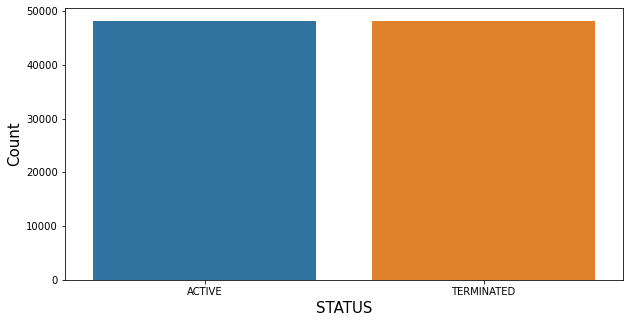

In [37]:
status_label=df_upsample.STATUS.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(status_label.index,status_label);
plt.xlabel('STATUS',fontsize=15);
plt.ylabel('Count',fontsize=15)

Classes are balanced

Distribution of Status based on City Name

<AxesSubplot:xlabel='city_name', ylabel='count'>

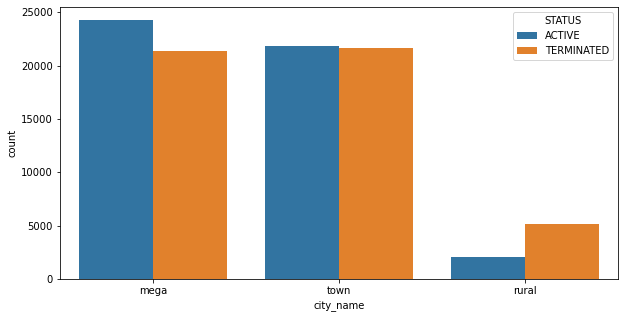

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x='city_name',hue="STATUS",data=df_upsample)

-> Maximum number of employees are from the mega city in which the ratio of active to terminated status of the employee is higher (active > terminated)

-> Number of employees from the town are less compared to mega city but mugh higher compared to rural area and the ratio of active to terminated status of the employee is almost the same (active ~ terminated)

-> The least number of employees are from rural areas and the ratio of active to terminated status of the employee is lower (active < terminated)

Distribution of Status based on Business Unit

<AxesSubplot:xlabel='BUSINESS_UNIT', ylabel='count'>

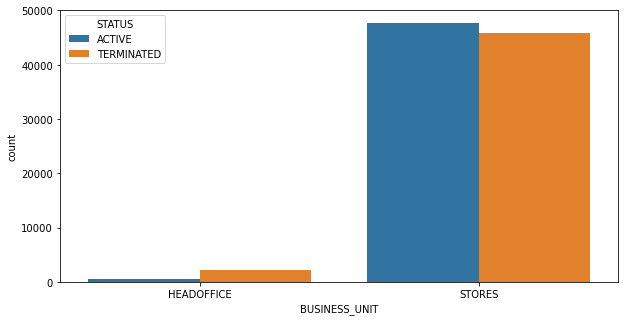

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(x="BUSINESS_UNIT", hue="STATUS", data=df_upsample)

-> More number of employees are from the stores and not from the head-office.


-> Cases of termination are higher in the head-office whereas cases of termination is lower in the stores.

Distribution of Status based on Job Title

<AxesSubplot:xlabel='job_title', ylabel='count'>

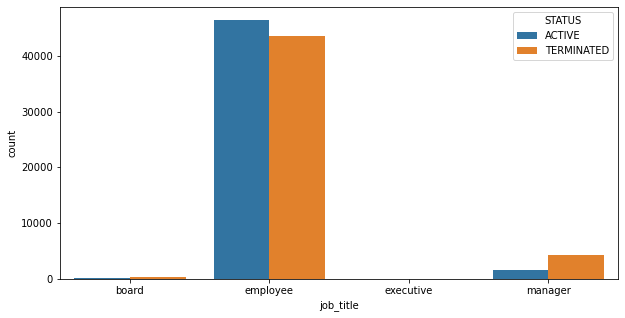

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x="job_title",hue="STATUS",data=df_upsample)

-> Maximum number of "Employees" are the ones with the employee job title and the number of ones with active status is more than the number of ones with terminated status.

Distribution of Status Year with respect to Status

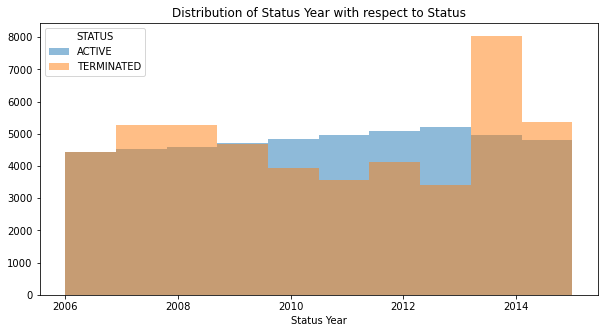

In [41]:
plt.figure(figsize=(10,5))
plt.hist("STATUS_YEAR",data=df_upsample[df_upsample["STATUS"]=="ACTIVE"],alpha=0.5,label="ACTIVE")
plt.hist("STATUS_YEAR", data = df_upsample[df_upsample["STATUS"] == "TERMINATED"], alpha = 0.5, label = "TERMINATED")
plt.title("Distribution of Status Year with respect to Status")
plt.xlabel("Status Year")
plt.legend(title = "STATUS")
plt.show()

Distribution of Length of Service with respect to Status

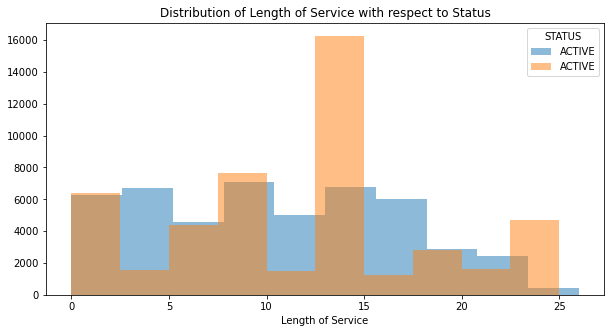

In [42]:
plt.figure(figsize=(10,5))
plt.hist("length_of_service",data=df_upsample[df_upsample["STATUS"]=="ACTIVE"],alpha=0.5,label="ACTIVE")
plt.hist("length_of_service",data=df_upsample[df_upsample["STATUS"]=="TERMINATED"],alpha=0.5,label="ACTIVE")
plt.title("Distribution of Length of Service with respect to Status")
plt.xlabel("Length of Service")
plt.legend(title = "STATUS")
plt.show()

Distribution of Age with respect to Status

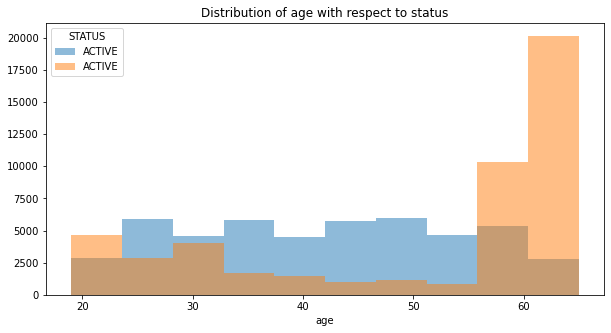

In [43]:
plt.figure(figsize=(10,5))
plt.hist("age",data=df_upsample[df_upsample["STATUS"]=="ACTIVE"],alpha=0.5,label="ACTIVE")
plt.hist("age",data=df_upsample[df_upsample["STATUS"]=="TERMINATED"],alpha=0.5,label="ACTIVE")
plt.title("Distribution of age with respect to status")
plt.xlabel("age")
plt.legend(title = "STATUS")
plt.show()

Distribution plot

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

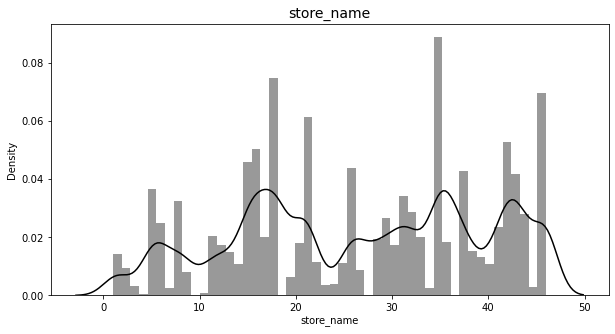

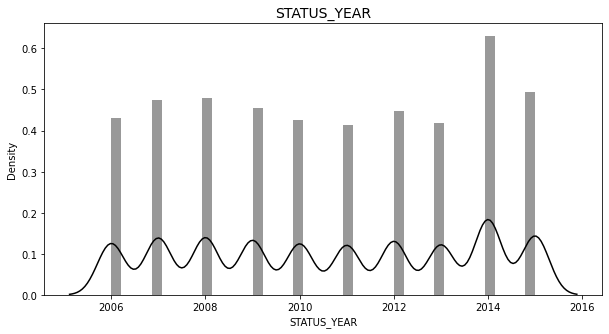

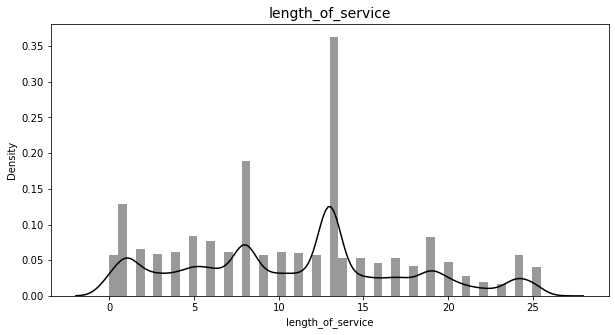

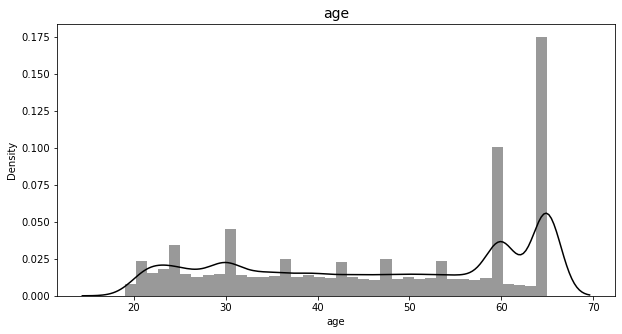

In [44]:
for column in ['store_name',"STATUS_YEAR","length_of_service","age"]:
    plt.figure(figsize=(10,5))
    sns.distplot(df_upsample[column],color="k",label="terminated",kde=True)
    plt.title(column,size=14)

# Data Pre-processing

In [45]:
df_upsample

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1/1/1900,52,17,mega,Executive,board,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,8/28/1989,1/1/1900,53,18,mega,Executive,board,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,8/28/1989,1/1/1900,54,19,mega,Executive,board,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,8/28/1989,1/1/1900,55,20,mega,Executive,board,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,8/28/1989,1/1/1900,56,21,mega,Executive,board,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48989,1/2/1999,6/27/2007,60,8,mega,Produce,employee,5,M,Retirement,Voluntary,2007,TERMINATED,STORES
48982,12/17/1998,6/11/2012,65,13,mega,Produce,employee,37,F,Retirement,Voluntary,2012,TERMINATED,STORES
48747,8/17/1996,2/10/2010,65,13,mega,Meats,employee,35,F,Retirement,Voluntary,2010,TERMINATED,STORES
49437,12/25/2008,6/7/2011,25,2,rural,Dairy,employee,19,F,Resignaton,Voluntary,2011,TERMINATED,STORES


Converting all categorical data into numerical data

In [46]:
from sklearn import preprocessing

In [47]:
label=df_upsample[["city_name","department_name","job_title","gender_short","termreason_desc","termtype_desc","STATUS","BUSINESS_UNIT"]]
for i in label:
    le=preprocessing.LabelEncoder()
    le.fit(df_upsample[i])
    df_upsample[i]=le.transform(df_upsample[i])

In [48]:
df_upsample

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1/1/1900,52,17,0,9,0,35,1,1,1,2006,0,0
1,8/28/1989,1/1/1900,53,18,0,9,0,35,1,1,1,2007,0,0
2,8/28/1989,1/1/1900,54,19,0,9,0,35,1,1,1,2008,0,0
3,8/28/1989,1/1/1900,55,20,0,9,0,35,1,1,1,2009,0,0
4,8/28/1989,1/1/1900,56,21,0,9,0,35,1,1,1,2010,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48989,1/2/1999,6/27/2007,60,8,0,17,1,5,1,3,2,2007,1,1
48982,12/17/1998,6/11/2012,65,13,0,17,1,37,0,3,2,2012,1,1
48747,8/17/1996,2/10/2010,65,13,0,15,1,35,0,3,2,2010,1,1
49437,12/25/2008,6/7/2011,25,2,1,7,1,19,0,2,2,2011,1,1


Correlation Matrix

Text(0.5, 1.0, 'Correlation matrix')

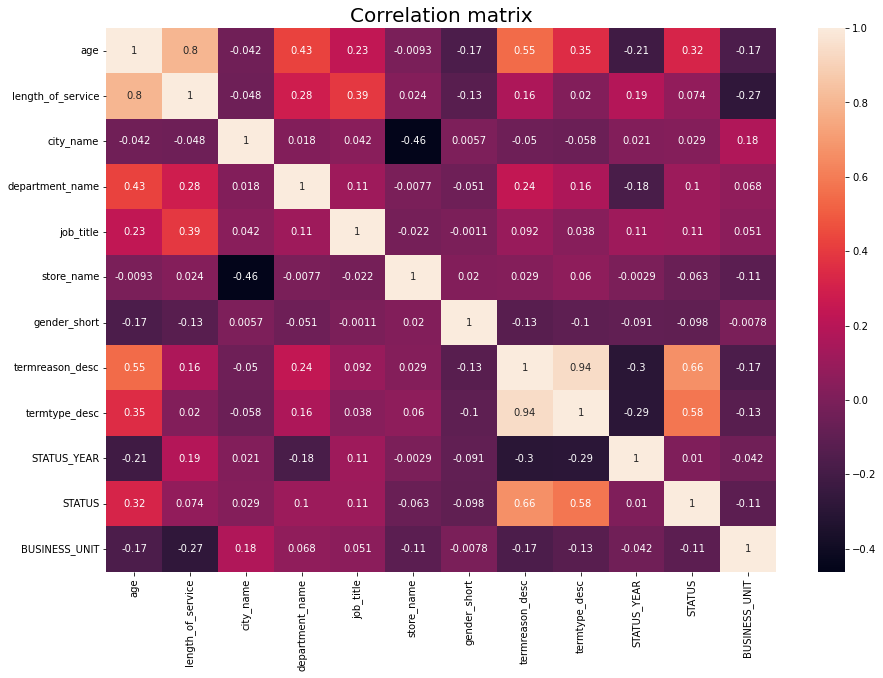

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(df_upsample.corr(),annot=True)
plt.title('Correlation matrix',fontsize=20)

Checking the Correlation of Status with repect to other features

In [50]:
df_upsample.corr()['STATUS'].sort_values(ascending=False)[1:]

termreason_desc      0.664829
termtype_desc        0.581840
age                  0.317897
job_title            0.108127
department_name      0.103472
length_of_service    0.074292
city_name            0.028644
STATUS_YEAR          0.010011
store_name          -0.063204
gender_short        -0.098284
BUSINESS_UNIT       -0.108561
Name: STATUS, dtype: float64

Dropping unimportant column

In [51]:
df_upsample.drop(["termreason_desc","termtype_desc","orighiredate_key","terminationdate_key"],axis=1,inplace=True)

In [52]:
df_upsample

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,52,17,0,9,0,35,1,2006,0,0
1,53,18,0,9,0,35,1,2007,0,0
2,54,19,0,9,0,35,1,2008,0,0
3,55,20,0,9,0,35,1,2009,0,0
4,56,21,0,9,0,35,1,2010,0,0
...,...,...,...,...,...,...,...,...,...,...
48989,60,8,0,17,1,5,1,2007,1,1
48982,65,13,0,17,1,37,0,2012,1,1
48747,65,13,0,15,1,35,0,2010,1,1
49437,25,2,1,7,1,19,0,2011,1,1


In [82]:
X=df_upsample.drop("STATUS",axis=1)

In [83]:
X.head()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,STATUS_YEAR,BUSINESS_UNIT
0,52,17,0,9,0,35,1,2006,0
1,53,18,0,9,0,35,1,2007,0
2,54,19,0,9,0,35,1,2008,0
3,55,20,0,9,0,35,1,2009,0
4,56,21,0,9,0,35,1,2010,0


In [55]:
y=df_upsample["STATUS"]

In [56]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: STATUS, dtype: int32

# model building

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc

In [58]:
accuracy_list = []
f1_list = []
roc_auc_list = []

# Models

In [62]:
def result(X, y, ts, rs, model):
    
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)
    
    #scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #fit on data
    model.fit(X_train, y_train)
    
    #prediction
    pred = model.predict(X_test)
    
    #performance of model
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()
    
    #accuracy of model
    acc = accuracy_score(y_test, pred)
    accuracy_list.append(acc)
    print("Accuracy Score: ", acc)
    print("-" * 100)
    print()

    #f1-score of model
    f1 = f1_score(y_test, pred)
    f1_list.append(f1)
    print("F1 Score: ", f1)
    print("-" * 100)
    print()

    #roc-auc curve of model
    fpr,tpr,threshold = roc_curve(y_test,pred)
    auc_value = auc(fpr,tpr)
    rocauc_score = roc_auc_score(y_test, pred)
    roc_auc_list.append(rocauc_score)
    plt.figure(figsize=(5,5),dpi=100)
    print("ROC-AUC Score: ", f1)
    print("-" * 100)
    print()
    plt.plot(fpr,tpr,linestyle='-',label = "(auc_value = %0.3f)" % auc_value)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    print()
    
    #confusion matrix for model
    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
    plt.title('Confusion Matrix', fontsize=20)

knn

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     14432
           1       0.95      1.00      0.97     14469

    accuracy                           0.97     28901
   macro avg       0.98      0.97      0.97     28901
weighted avg       0.98      0.97      0.97     28901

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9742223452475693
----------------------------------------------------------------------------------------------------

F1 Score:  0.9748489247493333
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9748489247493333
----------------------------------------------------------------------------------------------------



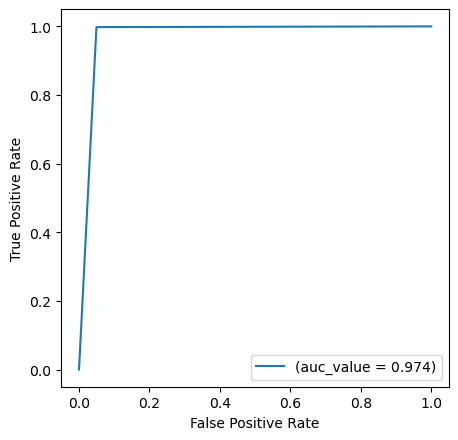


Confusion Matrix: 


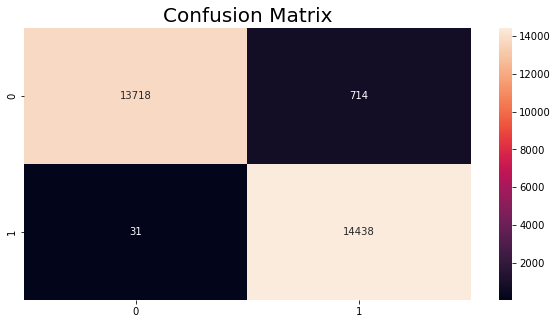

In [63]:
knn=KNeighborsClassifier()
result(x,y,0.3,10,knn)

Decision tree

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     12052
           1       0.98      1.00      0.99     12032

    accuracy                           0.99     24084
   macro avg       0.99      0.99      0.99     24084
weighted avg       0.99      0.99      0.99     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9896196645075569
----------------------------------------------------------------------------------------------------

F1 Score:  0.9897178580241837
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9897178580241837
----------------------------------------------------------------------------------------------------



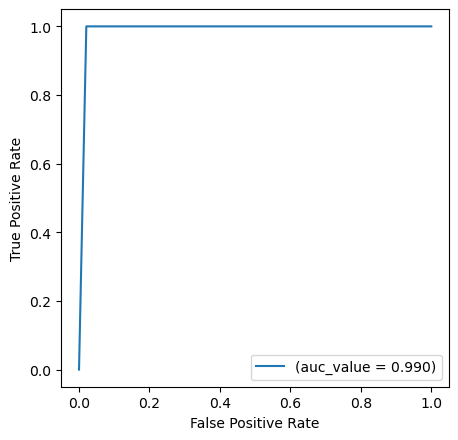


Confusion Matrix: 


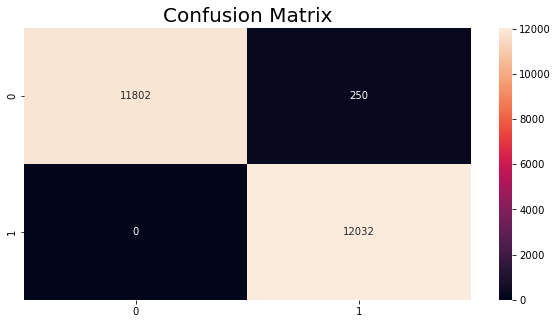

In [64]:
dt=DecisionTreeClassifier()
result(x,y,0.25,10,dt)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     12052
           1       0.98      1.00      0.99     12032

    accuracy                           0.99     24084
   macro avg       0.99      0.99      0.99     24084
weighted avg       0.99      0.99      0.99     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9906161767148314
----------------------------------------------------------------------------------------------------

F1 Score:  0.9906957595718403
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9906957595718403
----------------------------------------------------------------------------------------------------



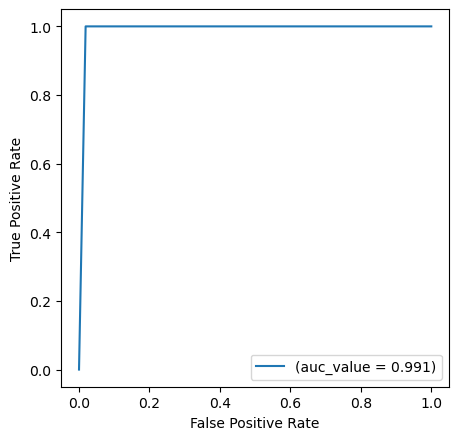


Confusion Matrix: 


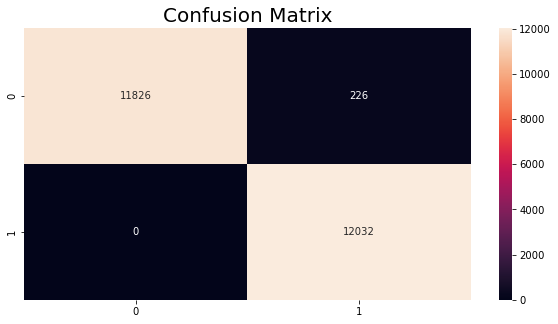

In [65]:
rfc=RandomForestClassifier()
result(x,y,0.25,10,rfc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.92      0.74     12052
           1       0.84      0.42      0.56     12032

    accuracy                           0.67     24084
   macro avg       0.72      0.67      0.65     24084
weighted avg       0.72      0.67      0.65     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.6705696728118252
----------------------------------------------------------------------------------------------------

F1 Score:  0.5627686542488702
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.5627686542488702
----------------------------------------------------------------------------------------------------



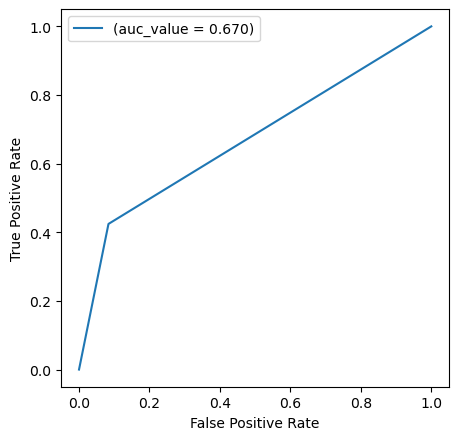


Confusion Matrix: 


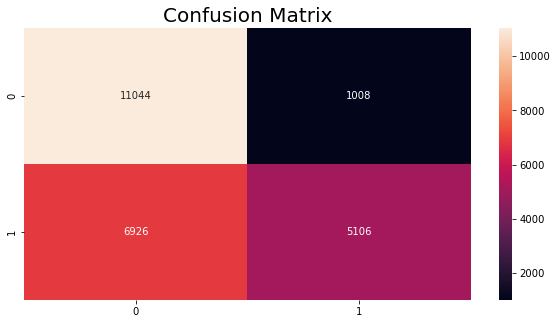

In [66]:
nb=GaussianNB()
result(x,y,0.25,10,nb)

Logistic Regression

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.86      0.80     12052
           1       0.84      0.72      0.78     12032

    accuracy                           0.79     24084
   macro avg       0.80      0.79      0.79     24084
weighted avg       0.80      0.79      0.79     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.7908985218402259
----------------------------------------------------------------------------------------------------

F1 Score:  0.7753189970554119
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.7753189970554119
----------------------------------------------------------------------------------------------------



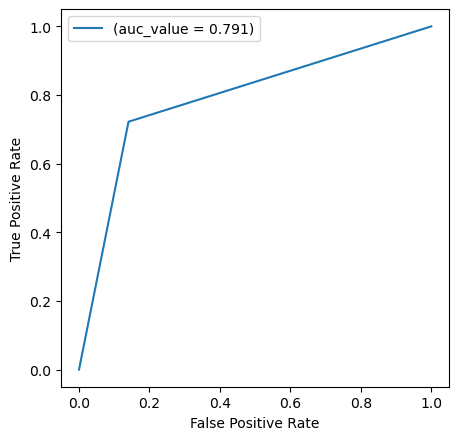


Confusion Matrix: 


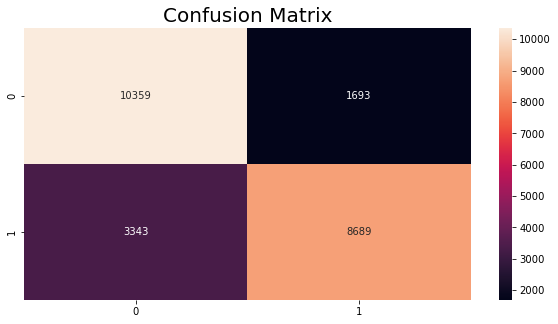

In [67]:
lg=LogisticRegression()
result(x,y,0.25,10,lg)

Gradient Boosting Classifier

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.92     12052
           1       0.96      0.86      0.91     12032

    accuracy                           0.91     24084
   macro avg       0.92      0.91      0.91     24084
weighted avg       0.92      0.91      0.91     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9118501909981731
----------------------------------------------------------------------------------------------------

F1 Score:  0.9071912568306011
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9071912568306011
----------------------------------------------------------------------------------------------------



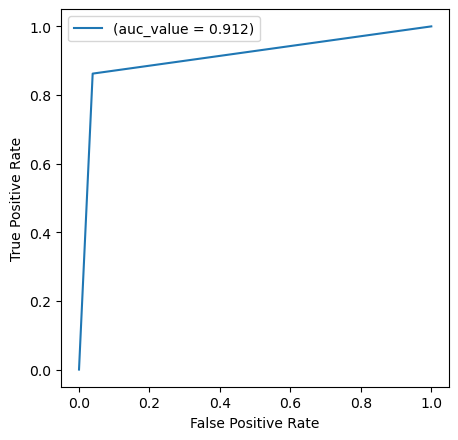


Confusion Matrix: 


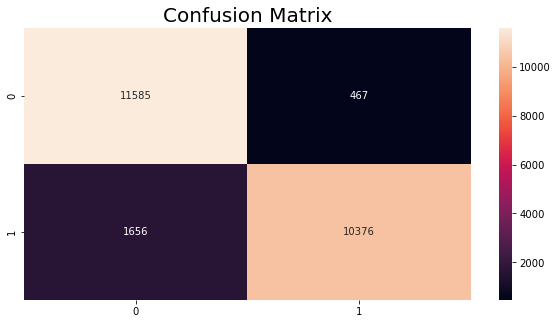

In [68]:
gb=GradientBoostingClassifier()
result(x,y,0.25,10,gb)

# classifier comparison

In [75]:
classifier_list =["KNN","Decision Tree","Random Forest Classifier","Naive bayes","Logistic Regression","Gradient Boosting Classifier"]
list_class =[]
for i in range(0,len(classifier_list)):
    listclass = [classifier_list[i],accuracy_list[i],f1_list[i],roc_auc_list[i]]
    list_class.append(listclass)
    
list_class

[['KNN', 0.9742223452475693, 0.9748489247493333, 0.9741920479811645],
 ['Decision Tree', 0.9896196645075569, 0.9897178580241837, 0.9896282774643212],
 ['Random Forest Classifier',
  0.9906161767148314,
  0.9906957595718403,
  0.9906239628277465],
 ['Naive bayes', 0.6705696728118252, 0.5627686542488702, 0.6703653902680583],
 ['Logistic Regression',
  0.7908985218402259,
  0.7753189970554119,
  0.7908414848820007],
 ['Gradient Boosting Classifier',
  0.9118501909981731,
  0.9071912568306011,
  0.91180913294165]]

In [76]:
cc_table = pd.DataFrame(list_class, columns = ["Classifier", "Accuracy", "F1 Score", "ROC-AUC Score"])
cc_table.sort_values(ascending = False, by = "Accuracy")

,Classifier,Accuracy,F1 Score,ROC-AUC Score
2,Random Forest Classifier,0.990616,0.990696,0.990624
1,Decision Tree,0.989620,0.989718,0.989628
0,KNN,0.974222,0.974849,0.974192
5,Gradient Boosting Classifier,0.911850,0.907191,0.911809
4,Logistic Regression,0.790899,0.775319,0.790841
3,Naive bayes,0.670570,0.562769,0.670365


Plotting the Comparison Table as a Bar Plot

For Accuracy

<AxesSubplot:xlabel='Accuracy', ylabel='Classifier'>

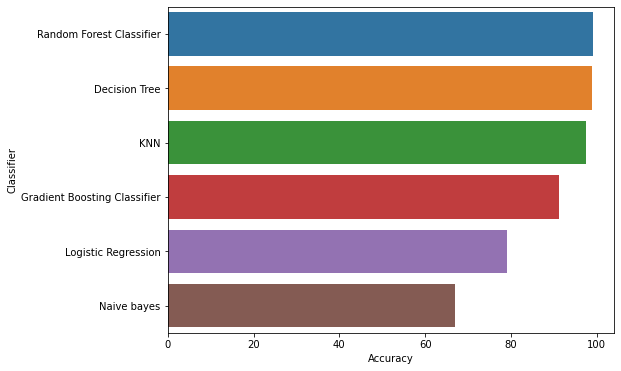

In [77]:
plt.figure(figsize = (8,6))
sns.barplot(x = cc_table["Accuracy"]*100, 
            y = cc_table["Classifier"], 
            data = cc_table, 
            order = cc_table.sort_values("Accuracy", ascending = False).Classifier)

For F1 Score

<AxesSubplot:xlabel='F1 Score', ylabel='Classifier'>

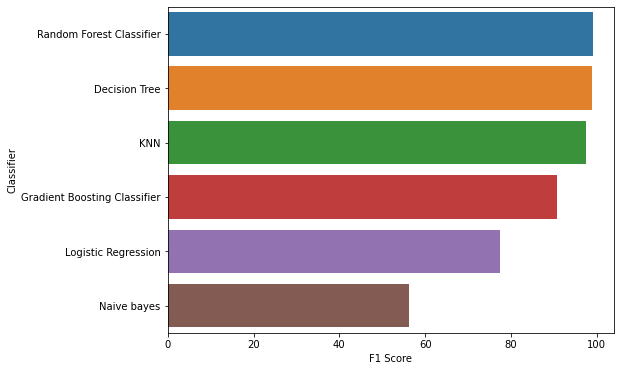

In [78]:
plt.figure(figsize = (8,6))
sns.barplot(x = cc_table["F1 Score"]*100, 
            y = cc_table["Classifier"], 
            data = cc_table, 
            order = cc_table.sort_values("F1 Score", ascending = False).Classifier)

For ROC-AUC Score

<AxesSubplot:xlabel='ROC-AUC Score', ylabel='Classifier'>

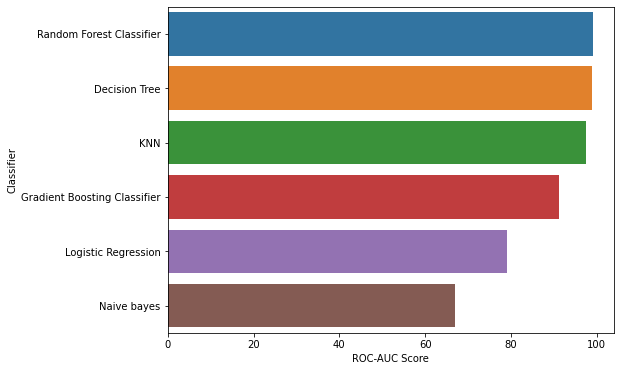

In [79]:
plt.figure(figsize = (8,6))
sns.barplot(x = cc_table["ROC-AUC Score"]*100, 
            y = cc_table["Classifier"], 
            data = cc_table, 
            order = cc_table.sort_values("ROC-AUC Score", ascending = False).Classifier)

Conclusion: After comparing the evaluation metrics of each model, we can conclude that Random Forest Classifier seems to be the best classifier that can be used and Decision Tree would be the next best option.